In [52]:
# https://www.youtube.com/watch?v=LsK-xG1cLYA
# https://i.stack.imgur.com/CTpi9.png
from sklearn import tree
import pandas as pd
import numpy as np
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



In [55]:
df = pd.read_csv("./dataset(3)/adaboost_train.csv")
df_test = pd.read_csv("./dataset(3)/adaboost_test.csv")

X_train = df.loc[:,'x1':'x10']
Y_train = df[['y']]

x_test = df_test.loc[:,'x1':'x10']
y_test = df_test[['y']]


In [90]:
def adaBoost(X_train,Y_train, clf,iterations):
    classifiers = []
    # initializing the weights:
    N = len(Y_train)
    w_i = [1 / N] * N

    T = iterations
    clf_errors = []

    for t in range(T):  
        print("Iteration started:", t)
        clf.fit(X_train, Y_train, sample_weight = w_i)
        
        #Predict all the values:
        y_pred = clf.predict(X_train)   
            
        error_internal = calc_error(w_i,Y_train,y_pred)
        
        alpha = np.log((1-error_internal)/ error_internal)
        
        # Add the predictions and alpha for later use for every iteration
        classifiers.append((y_pred, alpha))
                
        w_i = update_weights(w_i,y_pred,Y_train,alpha,clf)
        
    # Output the final prediction:
    G = output(classifiers, X_train)
    return G

    
def output(clfs, X_train):
    s = np.zeros(len(X_train))
    i = 0
    for (y_pred, alpha) in clfs:
        s += alpha*y_pred
        i += 1
    return np.sign(s)


def calc_error(weights,Y_train,y_pred):
    err = 0
    for i in range(len(weights)):
        if y_pred[i] != Y_train['y'].iloc[i]:
            err= err + weights[i]
    # Normalizing the error:
    err = err/np.sum(weights)
    return err

# If the prediction is true, return 0. If it is not true, return 1.
def check_pred(y_p, y_t):
    if y_p == y_t:
        return 0
    else:
        return 1
    
def update_weights(w,y_pred,Y_train,alpha,clf):
    for j in range(len(w)):
        if y_pred[j] != Y_train['y'].iloc[j]:
            w[j] = w[j]* (np.exp( alpha * 1))
    return w
          
def calculate_error_clf(y_pred, y):
    sum_error = 0
    for i in range(len(y)):
        if y_pred[i] != y.iloc[i]['y']:
            sum_error += 1
        e = (y_pred[i] - y.iloc[i]['y'])**2
        
        
        #sum_error += e
    # normalizing:
    sum_error = sum_error
    return sum_error



 
Adaboost, run: 0
Iteration started: 0
 
Adaboost, run: 1
Iteration started: 0
Iteration started: 1
 
Adaboost, run: 2
Iteration started: 0
Iteration started: 1
Iteration started: 2
 
Adaboost, run: 3
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration started: 3
 
Adaboost, run: 4
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration started: 3
Iteration started: 4
 
Adaboost, run: 5
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration started: 3
Iteration started: 4
Iteration started: 5
 
Adaboost, run: 6
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration started: 3
Iteration started: 4
Iteration started: 5
Iteration started: 6
 
Adaboost, run: 7
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration started: 3
Iteration started: 4
Iteration started: 5
Iteration started: 6
Iteration started: 7
 
Adaboost, run: 8
Iteration started: 0
Iteration started: 1
Iteration started: 2
Iteration 

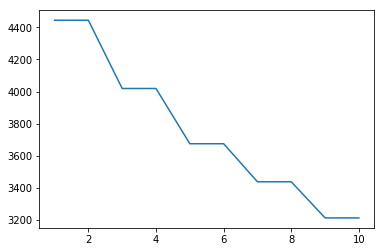

In [91]:
weak_clf = tree.DecisionTreeClassifier(max_depth = 1)
# c = adaBoost(X_train, Y_train,weak_clf,1)

def find_iteration_errors(it, X,Y_train):
    errors = np.zeros(it)
    # plt.figure()
    # plt.plot(x,y)
    
    for i in range(it):
        print(" ")
        print("Adaboost, run:", i)
        final_pred = adaBoost(X_train, Y_train,weak_clf,i+1)
        errors[i] = calculate_error_clf(final_pred, Y_train)
    x_vals = list(range(1,it+1))
    
    plt.plot(x_vals, errors)
    return 1
        

error_res = find_iteration_errors(10,X_train,Y_train)

print(" ")
print(error_res)


In [ ]:
a = [  1.07416667   1.15221122   1.26750073   1.36771538   1.48236743
   1.58988907   1.71119507   1.8270263    1.99026647   2.14015368
   2.3348519    2.51272268   2.75908171   2.97828053   3.27060058
   3.53023338   3.76670674   3.99704108   4.27788256   4.5495414
   4.93506701   5.29289851   5.79017099   6.23834557   6.67363875
   7.09434691   7.72648934   8.29927296   9.09138937   9.78182226
  10.72470895  11.54339744  12.36975779  13.16551895  14.10476381
  15.00677706  16.23821602  17.38139213  18.70497891  19.94586914
  21.75535205  23.3540812   25.13934856  26.80759423  28.69769378
  30.49131412  33.14177918  35.50844746  38.19825555  40.71155195
  44.06033217  47.10567442  51.52476383  55.25651025  58.67638797
  61.98180932  65.63103277  69.18083788  74.23875745  78.96365097
  85.73631986  91.71727522  97.79981657 103.59674021 109.85807466
 115.89414937 122.90792113 129.66669215 136.90227918 143.94316645
 153.12727021 161.87938238 171.18662168 180.18191721 190.31974746
 200.14045327 216.51019633 230.9360824  247.52801389 262.80507311
 277.97670703 292.5953711  308.69230008 324.31681619 348.93585357
 371.21135875 399.10824474 424.31911024 444.81477697 464.98234178
 489.3903222  513.17904405 536.94524912 562.74096628 608.63369284
 635.16203193 661.40960691 696.81297728 731.12258153 769.79711472]

In [ ]:
print(np.exp(1))

In [ ]:
# def update_weights(w,X_train,Y_train,alpha,clf):
  #   for j in range(len(w)):
  #      w[j] = w[j] * np.exp(alpha*check_pred(classifier, X_train[j], Y_train['y'].iloc[j]))
  #   return 1

In [ ]:
# Creating G(x):
    # result = 0
    # for c in classifiers:
        # result += c[2]* c[0](x)
    # res = np.sign(res)